# Desafío - Naive Bayes

__Integrantes:__ 

- Yerko Carreño
- Javier Pilasi 
- Daniel Flores
- Francisco Fernandez
- Máximo Oliva
- Rocío Ehijo
- Cristián Contreras


# Descripción

Trabajaremos con una base de datos sobre clientes morosos de un banco. Dentro de ésta se registran las siguientes observaciones:
- default : Variable Binaria. Registra si el cliente entró en morosidad o no.
- income : Ingreso promedio declarado por el cliente.
- balance : total del sando en la cuenta de crédito.
- student : Variable binaria. Registra si el cliente es estudiante o no.

## Preparación de ambiente de trabajo

- Importe los módulos básicos para el análisis de datos
- Importe las clases LabelEncoder, StandardScaler y LabelBinarizer de preprocessing
- Importe las funciones train_test_split y cross_val_score de model_selection
- Importe la función classification_report de metrics
- Importe las clases LinearDiscriminantAnalysis y QuadraticDiscriminantAnalysis
- Agregue la base de datos en el ambiente de trabajo
- Inspeccione la distribución de cada atributo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.pipeline import Pipeline
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import missingno as msngo
import warnings

from IPython.display import display, Markdown

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("default_credit.csv", index_col=0)
display(df.head())

display(Markdown("""#### Información de datos no nulos y nombres de columnas para base de datos"""))

display(df.info())

,default,student,balance,income
index,,,,
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


#### Información de datos no nulos y nombres de columnas para base de datos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


None

#### Visualización de datos numéricos

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


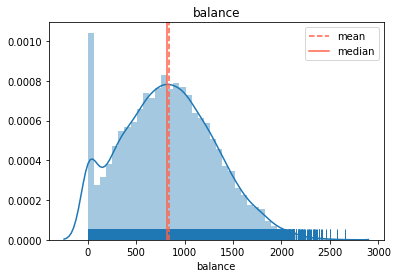

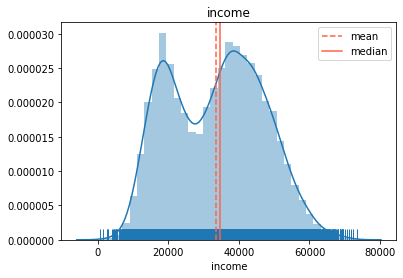

In [3]:
var_categoricas = list(df.select_dtypes(include=['object']).columns)
var_numericas = list(df.select_dtypes(include=['float64']).columns)

display(Markdown("#### Visualización de datos numéricos"))

display(df.describe())

def graficar(df, variable):

    temp = df[variable]
    temp = temp.dropna()

    plt.figure()
    plt.title(variable)

    sns.distplot(temp, rug=True, )
    plt.axvline(temp.mean(), color='tomato', linestyle='--', label='mean')
    plt.axvline(temp.median(), color='tomato', linestyle='-', label='median')
    plt.legend()
    
for var in var_numericas:
    graficar(df, var)

#### Visualización de datos categóricos

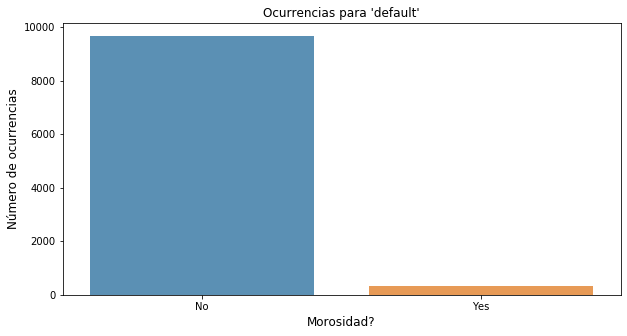

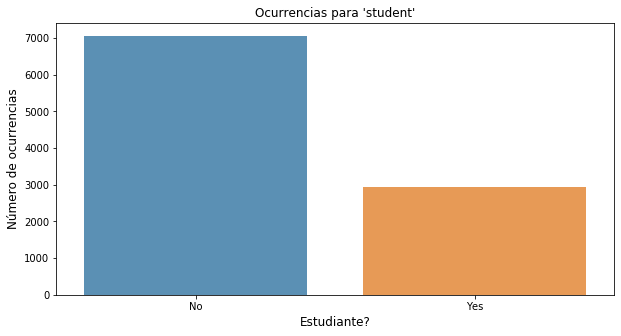

In [4]:
display(Markdown("#### Visualización de datos categóricos"))

default_count  = df["default"].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(default_count.index, default_count.values, alpha=0.8)
plt.title("Ocurrencias para 'default'")
plt.ylabel("Número de ocurrencias", fontsize=12)
plt.xlabel("Morosidad?", fontsize=12)
plt.show()

student_count  = df["student"].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(student_count.index, student_count.values, alpha=0.8)
plt.title("Ocurrencias para 'student'")
plt.ylabel("Número de ocurrencias", fontsize=12)
plt.xlabel("Estudiante?", fontsize=12)
plt.show()

## Modelo base

- Recuerde que los modelos de sklearn no soportan datos que no sean numéricos. Transforme los atributos pertinentes con LabelEncoder.
- Genere muestras de validación y entrenamiento, reservando un 33% de los datos como validación.
- Genere un modelo con LinearDiscriminantAnalysis sin modificar los hiperparámetros. Genere métricas de evaluación utilizando classification_report.
- Comente sobre cuál es el desempeño del modelo en cada clase, así como en general.

In [5]:
df['default'] = LabelEncoder().fit_transform(df['default'])
df['student'] = LabelEncoder().fit_transform(df['student'])
df.head()

,default,student,balance,income
index,,,,
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879


In [6]:
y = df['default']
X = df.loc[:,'student':'income']

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.33, random_state = 7082019)

In [7]:
def get_metricas(X_train, y_train, tipo="LDA", priors=None):
    if tipo == 'LDA':
        metodo = LinearDiscriminantAnalysis(priors=priors)
    else:
        metodo = QuadraticDiscriminantAnalysis(priors=priors)

    modelo = metodo.fit(X_train, y_train)
    y_hat = modelo.predict(X_test)
    
    display(Markdown("**Métricas de modelo**"))
    
    display(pd.DataFrame(
        classification_report(
            y_test,
            y_hat,
            output_dict=True
    )))

In [8]:
get_metricas(X_train, y_train)

**Métricas de modelo**

,0,1,accuracy,macro avg,weighted avg
f1-score,0.986687,0.385714,0.973939,0.686201,0.967201
precision,0.975513,0.818182,0.973939,0.896847,0.970411
recall,0.998121,0.252336,0.973939,0.625229,0.973939
support,3193.000000,107.000000,0.973939,3300.000000,3300.000000


### Observaciones:

- Se compararán los modelos usando la métrica f1, enfocándose en la predicción de los clientes morosos. Igualmente se comentarán ambos casos.
- El modelo clasifica muy bien la clase no moroso con un 96,6% de precisión, y tienen un excelente recall 99,8%.
- Para la clase moroso tiene un pésimo recall de un 25%, y una buena presición 81,8%. Lo que significa que el modelo sólo logra capturar un bajo porcentaje de morosos. El f1 es de 38,6%.

Esto se debe a un claro problema de desbalanceo de datos, como se aprecia en el gráfico de ocurrencias para `default`.

## Refactorización 1 - información a priori
- Dado que trabajamos con modelos generativos, podemos incluír información exógena. Para este caso agregaremos dos distribuciones:
    - Asumamos que hay un 50/50 de morosos y no morosos.
    - Asumamos que hay un 60/40 de morosos y no morosos.
- Por cada modelo, reporte las métricas de clasificación.

In [9]:
get_metricas(X_train, y_train, priors=[0.5, 0.5])

**Métricas de modelo**

,0,1,accuracy,macro avg,weighted avg
f1-score,0.910824,0.276243,0.841212,0.593533,0.890248
precision,0.997391,0.162075,0.841212,0.579733,0.970306
recall,0.838083,0.934579,0.841212,0.886331,0.841212
support,3193.000000,107.000000,0.841212,3300.000000,3300.000000


In [10]:
get_metricas(X_train, y_train, priors=[0.4, 0.6])

**Métricas de modelo**

,0,1,accuracy,macro avg,weighted avg
f1-score,0.879467,0.228700,0.791515,0.554083,0.858367
precision,0.998012,0.129936,0.791515,0.563974,0.969865
recall,0.786095,0.953271,0.791515,0.869683,0.791515
support,3193.000000,107.000000,0.791515,3300.000000,3300.000000


### Observaciones:

- Ambos modelos mejoran la presición de la clasificación no moroso, en comparación del primer caso, 99,7% para el 50/50 y 99.8% para el 60/40. El recall tuvo una baja a 83.8% y 78,6%.

- Para la clase moroso, en ambos casos hay un aumento grande del recall, hasta un 93,5% en el caso 50/50 y de 95,3% en el caso de 60/40. El problema es que la precisión bajo tremendamente a menos del 16,2% en el 50/50. De todas formas el f1 de ambos modelos disminuyó en comparación con el primer modelo.

## Refactorización 2 - oversampling
Digresión: Synthetic Over(Under)Sampling

* Por lo general podemos intentar aliviar el problema del desbalance de clases mediante la ponderación dentro del algoritmo. Otra alternativa es el muestreo con reemplazo dentro de los conjuntos de entrenamiento. Estos métodos clásicos se conocen como Oversampling cuando repetimos registros aleatorios de la clase minoritaria, y Undersampling cuando eliminamos aleatoriamente registros de la clase mayoritaria.
* Un contratiempo de estos métodos clásicos es que pueden replicar información sesgada que afecte el desempeño de generalización del modelo. Si los datos son malos, estaremos replicando estas fallas.
* Otra solución es generar ejemplos de entrenamiento sintéticos mediante el entrenamiento de ejemplos de la clase minoritaria. A grandes rasgos la solución funciona de la siguiente forma: 
    * En función a un subconjunto de datos correspondientes a la case minoritaria, entrenamos algún modelo no supervisado o generativo como Naive Bayes, KMeans o KNearestNeighbors para generar representaciones sintéticas de los datos en el espacio de atributos de la clase específica mediante 
    
    $\mathbf{x}_{nuevoEjemplo} = \mathbf{x}_{i} + \lambda (\mathbf{x}_{zi} - \mathbf{x}_{i})$ 
    
    donde 
    $\mathbf{x}_{zi}$ 
    es un ejemplo de entrenamiento de la clase minoritaria y $\lambda$ es un parámetro de interpolación aleatorio $\lambda \sim \textsf{Uniforme}(0, 1)$.
    
    
* Uno de los problemas más graves de esta base de datos, es el fuerte desbalance entre clases. Ahora generaremos observaciones sintéticas mediante SMOTE (Synthetic Minority Oversampling Technique). Para ello, debemos agregar el paquete a nuestro ambiente virtual. En nuestro terminal agregamos conda install -c conda-forge imbalanced-learn. Incorpore SMOTE en el ambiente de trabajo con la siguiente sintáxis from imblearn.over_sampling import SMOTE.

* Para implementar oversampling, debemos generar nuevos objetos que representan nuestra muestra de entrenamiento incrementada artificialmente. Para ello implemente la siguiente sintáxis:

```python
from imblearn.over_sampling import SMOTE
# Instanciamos la clase
oversampler = SMOTE(random_state=11238, ratio='minority')
# generamos el eversampling de la matriz de entrenamiento y
X_train_oversamp, y_train_oversamp = oversampler.fit_sample(X_train, y_train)
```

* Vuelva a entrenar el modelo con los datos aumentados de forma artificial y comente sobre su desempeño.

In [11]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE(random_state=11238, ratio='minority')

X_train_oversamp, y_train_oversamp = oversampler.fit_sample(X_train, y_train)

df_1 = pd.DataFrame(y_train_oversamp)

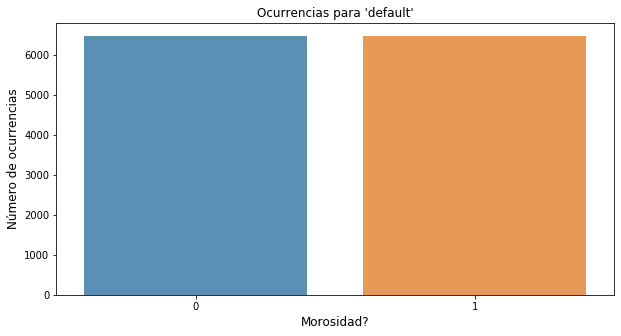

In [12]:
default_count  = df_1[0].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(default_count.index, default_count.values, alpha=0.8)
plt.title("Ocurrencias para 'default'")
plt.ylabel("Número de ocurrencias", fontsize=12)
plt.xlabel("Morosidad?", fontsize=12)
plt.show()

Se confirma que oversampling aumenta y balancea las muestras .

In [13]:
get_metricas(X_train_oversamp, y_train_oversamp)

**Métricas de modelo**

,0,1,accuracy,macro avg,weighted avg
f1-score,0.913413,0.281690,0.845455,0.597551,0.892929
precision,0.997405,0.165837,0.845455,0.581621,0.970442
recall,0.842468,0.934579,0.845455,0.888524,0.845455
support,3193.000000,107.000000,0.845455,3300.000000,3300.000000


### Observaciones:

- La clasificación para personas no morosas, se mantiene en 99,7%. El recall mejora levemente a 84.2%.

- Para la clase moroso, la presición aumentó levemente en comparación con los modelos del punto anterior, el recall sigue en un valor alto 93,5%. De todas formas el f1 del primer modelo sigue siendo mejor.

En conclusión, las mejoras son leves en comparación con el punto anterior. Y el primer modelo sigue siendo el mejor modelo.

## Refactorización 3 - QDA

* Por último, implemente un modelo QuadraticDiscriminantAnalysis con los datos aumentados artificialmente. Genere las métricas de desempeño.
* Comente a grandes rasgos sobre el mejor modelo en su capacidad predictiva.

In [14]:
get_metricas(X_train_oversamp, y_train_oversamp, tipo='QDA')

**Métricas de modelo**

,0,1,accuracy,macro avg,weighted avg
f1-score,0.926944,0.310127,0.867879,0.618535,0.906944
precision,0.996757,0.186667,0.867879,0.591712,0.970490
recall,0.866270,0.915888,0.867879,0.891079,0.867879
support,3193.000000,107.000000,0.867879,3300.000000,3300.000000


### Observaciones:

- La clasificación para personas no morosas, se mantiene en el 99,7%. Nuevamente el recall mejora levemente, a 86.6%.

- Para la clase moroso, la presición aumentó levemente a un valor del 18.7%, aunque tuvo una leve baja del recall a un valor de 91.6%, que igualmente es alto. El f1 es de 31%.

### Observaciones generales :

Se consideró que el objetivo del modelo debe ser predecir a clientes morosos, y se usaría la métrica f1 para la clasificación de clientes morosos. En base a esto el mejor modelo es el modelo base.

En los modelos refactorizados aparece un claro balance entre la presición y el recall, para la predicción de morosos, a medifa que el recall aumentó, disminuía la precisión.